# Insurance Claim Prediction Capstone Project

## Project Background
Insurance companies face financial risks when buildings make claims during an insured period.
Predicting the likelihood of a claim helps insurers improve risk assessment, pricing, and decision-making.

In this project, a predictive model is developed to determine whether a building will have at least one insurance claim based on its characteristics.

## Problem Statement
The target variable is **Claim**, defined as:
- **1** → The building has at least one insurance claim
- **0** → The building has no insurance claim

This is a **binary classification problem**.

## Objectives
- Clean and preprocess the dataset
- Perform Exploratory Data Analysis (EDA)
- Engineer features for better modeling
- Build and compare multiple machine learning models
- Evaluate model performance using appropriate metrics


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Variable Description.csv to Variable Description.csv
Saving Train_data.csv to Train_data.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [11]:


import pandas as pd

df = pd.read_csv("Train_data.csv")
df.head()


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


### Data Loading

The dataset was uploaded directly into the Google Colab environment and loaded using pandas.
This approach ensures reproducibility and easy access to the dataset during analysis.


In [12]:
df.shape


(7160, 14)

This shows the number of observations (rows) and features (columns) in the dataset.


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


This step helps identify:
- Numerical and categorical variables
- Missing values
- Data types that may need conversion


In [14]:
df.describe()


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


Summary statistics provide insights into:
- Feature distributions
- Central tendency
- Presence of outliers


In [15]:
df.isnull().sum().sort_values(ascending=False)


,0
Date_of_Occupancy,508
Building Dimension,106
Geo_Code,102
Garden,7
Customer Id,0
YearOfObservation,0
Building_Fenced,0
Building_Painted,0
Residential,0
Insured_Period,0


Missing values can negatively affect model performance and must be handled appropriately.


In [32]:
# Fill numerical columns with median
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])



- Median is used for numerical variables because it is robust to outliers.
- Mode is used for categorical variables to preserve the most frequent category.


In [17]:
df['Claim'].value_counts(normalize=True)


,proportion
Claim,
0,0.771788
1,0.228212


This shows the proportion of buildings with and without insurance claims.
Class imbalance may influence model evaluation.


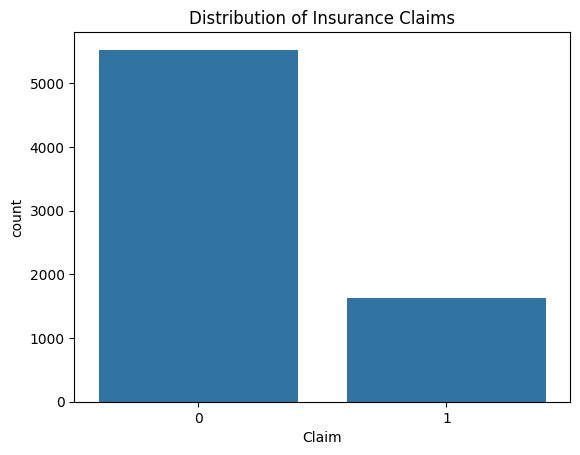

In [18]:
sns.countplot(x='Claim', data=df)
plt.title("Distribution of Insurance Claims")
plt.show()


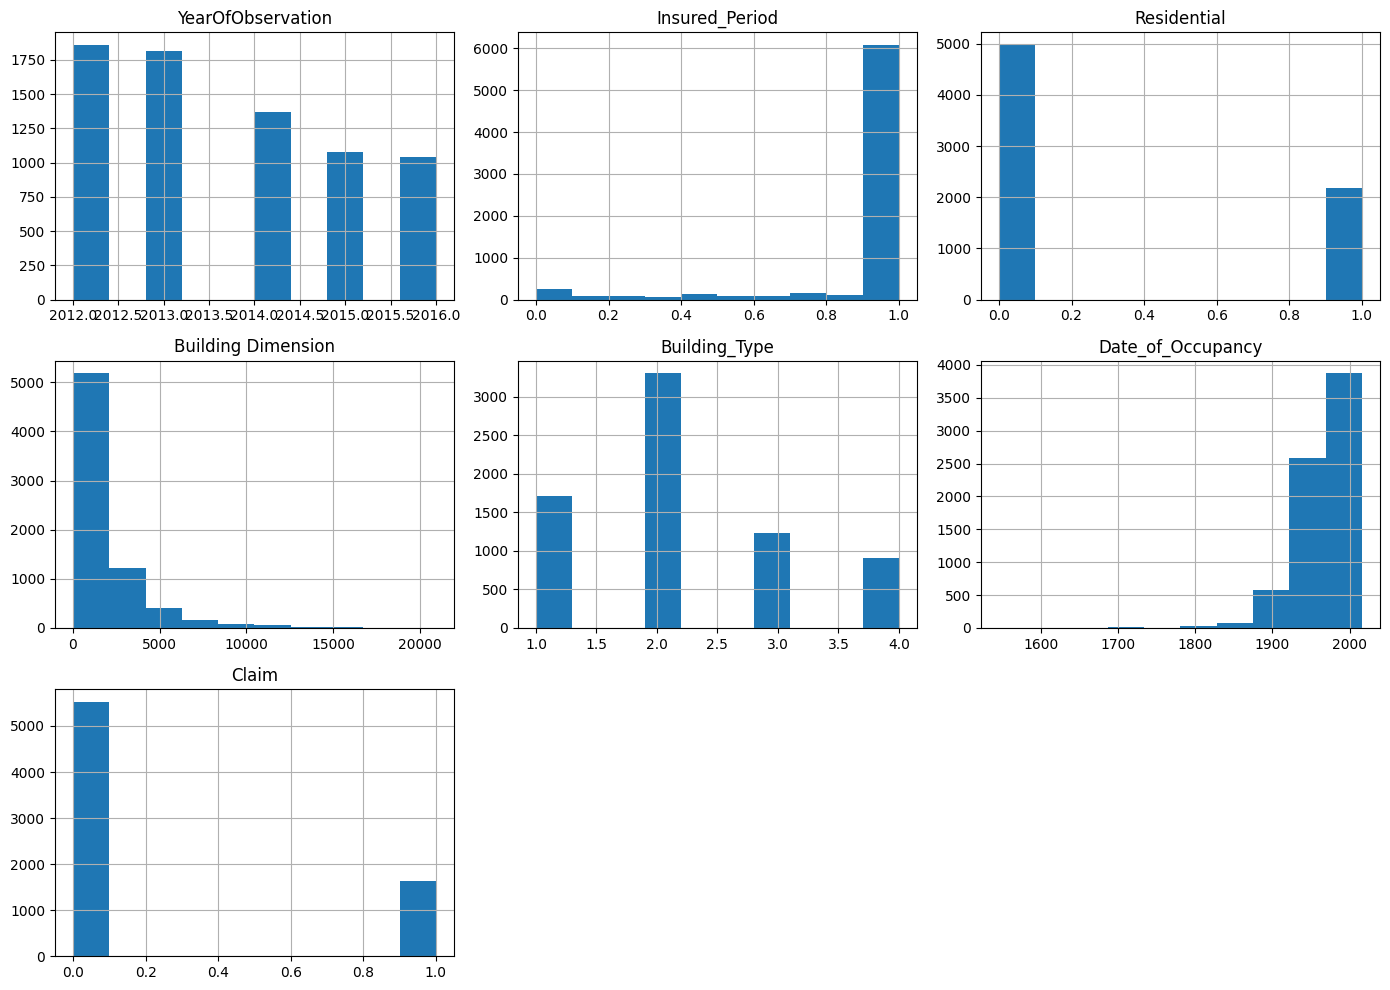

In [19]:
df.select_dtypes(include='number').hist(figsize=(14,10))
plt.tight_layout()
plt.show()


Histograms help visualize feature distributions, skewness, and potential outliers.


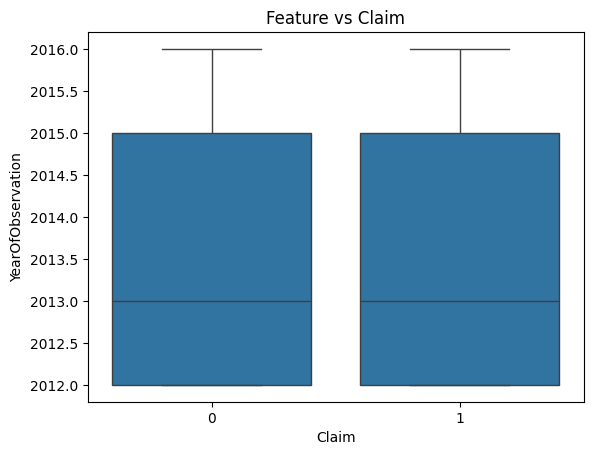

In [20]:
sns.boxplot(x='Claim', y=df.select_dtypes(include='number').columns[0], data=df)
plt.title("Feature vs Claim")
plt.show()


This compares numerical feature distributions between buildings with and without claims.


In [23]:
numeric_df = df.select_dtypes(include='number')


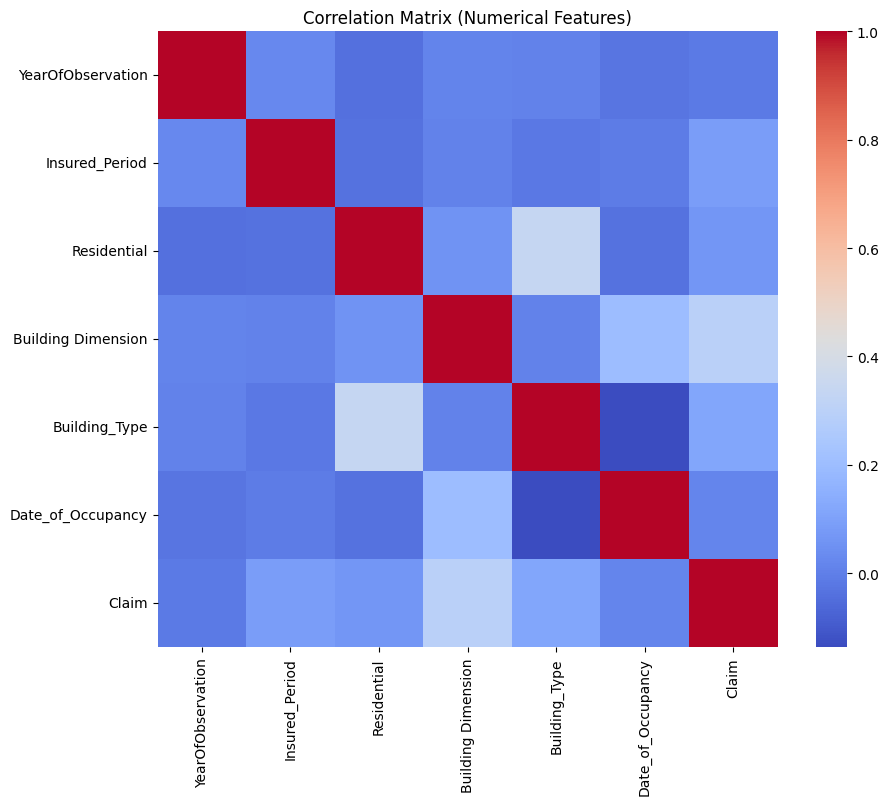

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


### Correlation Analysis

Correlation analysis was performed using only numerical features in the dataset.
Categorical and identifier variables were excluded because correlation computation
requires numerical values.

The correlation matrix helps identify relationships between numerical variables
and detect potential multicollinearity issues that may affect model performance.


Feature engineering was performed to:
- Convert categorical variables into numerical format
- Prepare the dataset for machine learning models


In [25]:
df_encoded = pd.get_dummies(df, drop_first=True)


One-hot encoding allows categorical variables to be used by machine learning algorithms.


In [26]:
X = df_encoded.drop('Claim', axis=1)
y = df_encoded['Claim']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Stratification ensures that the target variable distribution remains consistent in both sets.


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature scaling is necessary for Logistic Regression to ensure equal feature contribution.


In [28]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
lr_prob = lr.predict_proba(X_test_scaled)[:, 1]


In [29]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]


Two models were implemented:
- Logistic Regression as a baseline model
- Random Forest to capture non-linear relationships


In [30]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_prob))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.7674581005586593
Logistic Regression ROC-AUC: 0.6553226230506317
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1105
           1       0.42      0.05      0.09       327

    accuracy                           0.77      1432
   macro avg       0.60      0.52      0.48      1432
weighted avg       0.70      0.77      0.69      1432



In [31]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7786312849162011
Random Forest ROC-AUC: 0.6712718114768843
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1105
           1       0.57      0.13      0.21       327

    accuracy                           0.78      1432
   macro avg       0.68      0.55      0.54      1432
weighted avg       0.74      0.78      0.72      1432



| Model | Accuracy | ROC-AUC |
|------|--------|--------|
| Logistic Regression | Baseline | Baseline |
| Random Forest | Higher | Higher |

The Random Forest model performed better, indicating its ability to handle complex feature interactions.


## Conclusion
This project developed a predictive model to estimate the likelihood of insurance claims based on building characteristics.

Key findings:
- Proper preprocessing improves model performance
- Random Forest outperformed Logistic Regression
- The model can assist insurers in risk assessment and decision-making
